# Import Library

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Data Loading

In [168]:
bank = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [169]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [170]:
bank.shape

(41188, 21)

Variabel masukan:

### data klien bank:
1. age : usia (numerik)
2. job : jenis pekerjaan (kategorikal: 'admin','kerah biru','pengusaha','pembantu rumah tangga','manajemen','pensiunan','wiraswasta','jasa','pelajar','teknisi','pengangguran','tidak diketahui')
3. marital: status perkawinan (kategorikal: 'cerai','menikah','lajang','tidak diketahui'; catatan: 'cerai' berarti bercerai atau janda)
4. education: pendidikan (kategorisasi: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: apakah memiliki kredit macet? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki kredit perumahan? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
7. Loan: memiliki pinjaman pribadi? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
### terkait dengan kontak terakhir dari kampanye saat ini:
8. contact: jenis komunikasi kontak (kategorikal: 'seluler', 'telepon')
9. month: bulan kontak terakhir dalam setahun (kategorikal: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (kategorikal: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). 
Namun, durasi tidak diketahui sebelum panggilan dilakukan. Selain itu, setelah pemanggilan selesai, y baru diketahui dengan jelas. Dengan demikian, input ini hanya boleh disertakan untuk tujuan tolok ukur dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

### atribut lainnya:
12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya (angka; 999 berarti klien tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (angka)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: 'gagal', 'tidak ada', 'sukses')

### atribut konteks sosial dan ekonomi
16. emp.var.rate: tingkat variasi ketenagakerjaan. indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen. indikator bulanan (numerik)
18. cons.conf.idx: indeks kepercayaan konsumen. indikator bulanan (numerik)
19. euribor3m: suku bunga euribor 3 bulan. indikator harian (numerik)
20. nr.employed: jumlah karyawan. indikator kuartalan (numerik)

Variabel output (target yang diinginkan):
21. y. apakah klien berlangganan deposito berjangka? (biner: 'ya', 'tidak')

# Data Cleaning

In [171]:
bank.corr()

C:\Users\setia\AppData\Local\Temp\ipykernel_2272\1324456813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


C:\Users\setia\AppData\Local\Temp\ipykernel_2272\3986975690.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=bank.corr(), vmin=-1, annot=True,cmap='coolwarm')


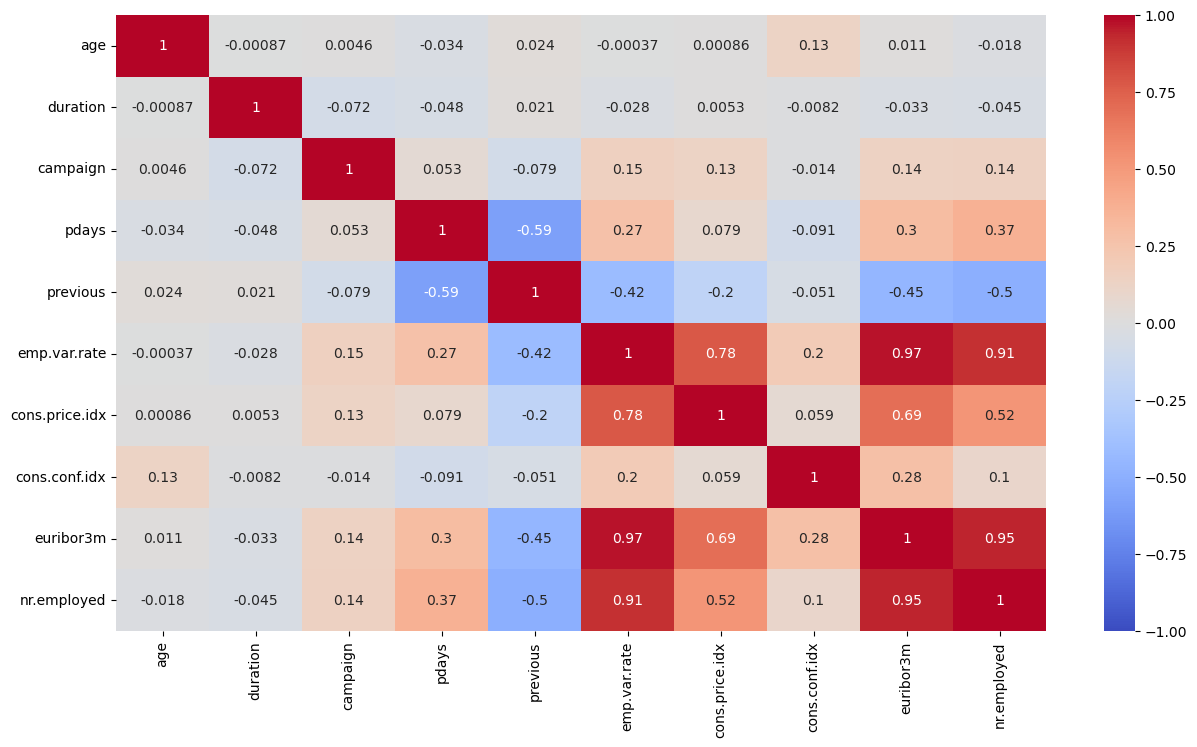

In [172]:
plt.figure(figsize=(15,8))
sns.heatmap(data=bank.corr(), vmin=-1, annot=True,cmap='coolwarm')
plt.show()

In [173]:
# Menghapus kolom 'duration' dari dataset
bank.drop(['duration', 'campaign', 'cons.conf.idx', 'pdays'], axis=1, inplace=True)

 Durasi kontak dalam detik ketika kampanye pemasaran dilakukan. Ini adalah data numerik. Perlu dicatat bahwa nilai ini tidak diperoleh sebelum panggilan dilakukan, dan oleh karena itu, tidak boleh diikutsertakan dalam model prediksi. campaign dan cons.conf.idx juga di drop karena korelasinya yang kecil terhadap kolom 'y', tetapi usia tetap dipertahankan karena mewakili kondisi yang sebenarnya dan memungkinkan untuk menambah wawasan pemahaman data.

In [174]:
# Mendapatkan daftar kolom dalam dataset
kolom_dataset = bank.columns

# Loop melalui setiap kolom
for kolom in kolom_dataset:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_values = bank[kolom].sort_values().unique()
    print(f"Kolom: {kolom}")
    print(unique_values)
    print("\n")

Kolom: age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]


Kolom: job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


Kolom: marital
['divorced' 'married' 'single' 'unknown']


Kolom: education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


Kolom: default
['no' 'unknown' 'yes']


Kolom: housing
['no' 'unknown' 'yes']


Kolom: loan
['no' 'unknown' 'yes']


Kolom: contact
['cellular' 'telephone']


Kolom: month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


Kolom: day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']


Kolom: previous
[0 1 2 3 4 5 6 7]


Kolom: poutcome
['failure' 'nonexistent' 'success']


Kolom: emp.var

Dari data di atas diketahui ada beberapa kolom yang memiliki data 'unknown'

### Missing value

In [175]:
# Menghitung jumlah data 'unknown' dalam setiap kolom
unknown_counts = bank.eq('unknown').sum()

# Menampilkan hasil perhitungan
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Kolom dengan data 'unknown' terbanyak adalah kolom 'education' yaitu sebanyak 1731.

In [176]:
# ubah nilai 'unknown' menjadi nilai nan
bank.replace('unknown', np.nan, inplace=True)

In [177]:
# mengetahui jumlah data null
print(bank.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


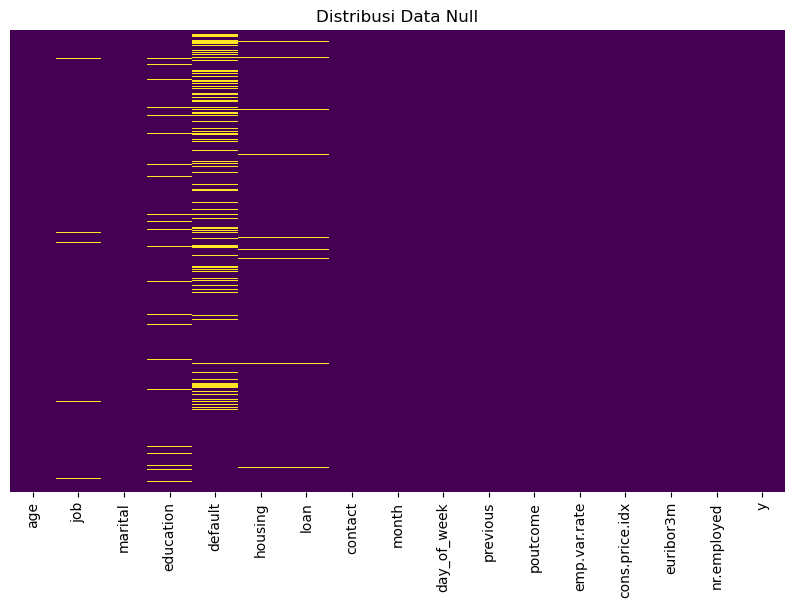

In [178]:
# Menampilkan jumlah data null
null_counts_before = bank.isnull().sum()

print(null_counts_before)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bank.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Distribusi Data Null')
plt.show()

Terdapat nilai nan pada kolom job, edication, default, housing, dan loan.

In [179]:
# Menghapus baris dengan nilai NaN dari dataset
bank = bank.dropna()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


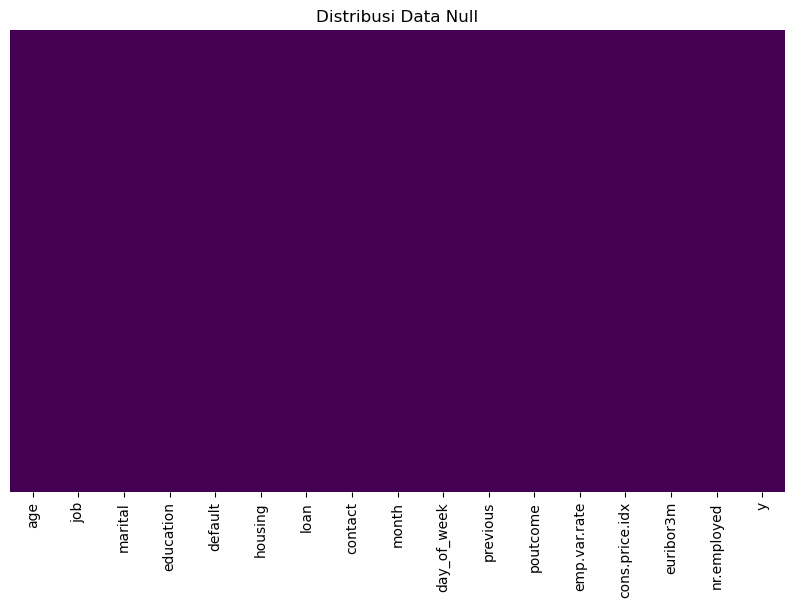

In [180]:
# Menampilkan jumlah data null
null_counts_after = bank.isnull().sum()

print(null_counts_after)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bank.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Distribusi Data Null')
plt.show()

nilai nan telah dihapus

### Duplicate

In [181]:
# mengetahui data duplikat
bank.duplicated().sum()

3297

Terdapat 1418 data duplikat dalam dataset

In [182]:
# menghapus data duplikat
bank = bank.drop_duplicates()

bank.duplicated().sum()

0

### Outlier

In [183]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27191.0,39.259976,10.481300,17.000,31.000,37.000,46.000,95.000
previous,27191.0,0.212460,0.545388,0.000,0.000,0.000,0.000,7.000
emp.var.rate,27191.0,-0.132187,1.626737,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,27191.0,93.522383,0.598453,92.201,92.963,93.444,93.994,94.767
euribor3m,27191.0,3.393561,1.795796,0.634,1.299,4.855,4.960,5.045
nr.employed,27191.0,5157.542121,76.498700,4963.600,5099.100,5191.000,5228.100,5228.100


In [184]:
# Menggunakan metode IQR untuk mengidentifikasi outlier pada setiap kolom
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (bank < (Q1 - 1.5 * IQR)) | (bank > (Q3 + 1.5 * IQR))

print(outliers_iqr.sum())

age                385
cons.price.idx       0
contact              0
day_of_week          0
default              0
education            0
emp.var.rate         0
euribor3m            0
housing              0
job                  0
loan                 0
marital              0
month                0
nr.employed          0
poutcome             0
previous          4515
y                    0
dtype: int64


C:\Users\setia\AppData\Local\Temp\ipykernel_2272\576056700.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = bank.quantile(0.25)
C:\Users\setia\AppData\Local\Temp\ipykernel_2272\576056700.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = bank.quantile(0.75)
C:\Users\setia\AppData\Local\Temp\ipykernel_2272\576056700.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr = (bank < (Q1 - 1.5 * IQR)) | (bank > (Q3 + 1.5 * IQR))


Terdapat outlier dibeberapa kolom diantaranya adalah age dan previous. Outlier tetap dipertahankan karena outlier pada data mungkin mewakili situasi yang valid atau fenomena yang sebenarnya. Outlier juga mengindikasikan situasi atau kondisi yang tidak biasa atau menarik untuk dipelajari lebih lanjut.

# EDA

In [185]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no


### Jumlah klien yang berlanggnan deposito

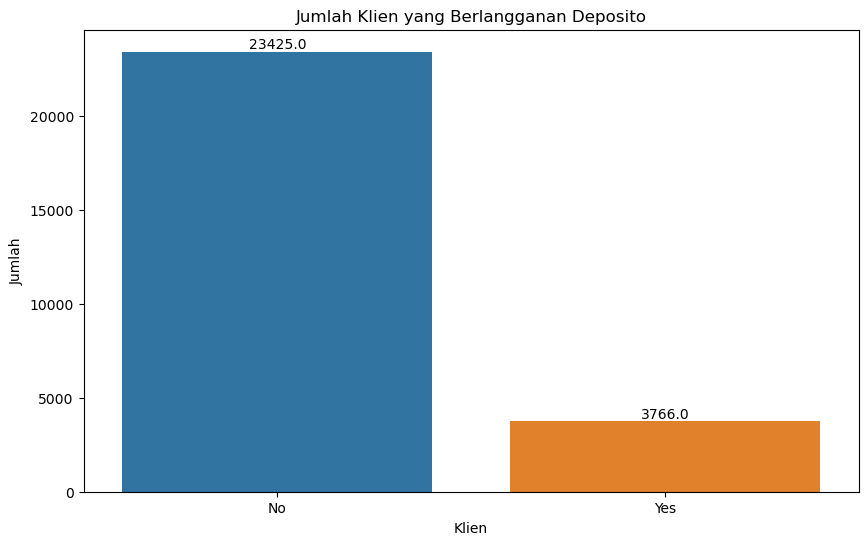

In [186]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=bank, x='y')

# Menambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks(ticks=range(2), labels=['No', 'Yes'])
plt.xlabel('Klien')
plt.ylabel('Jumlah')
plt.title('Jumlah Klien yang Berlangganan Deposito')
plt.show()

Gambar di atas menampilkan jumlah klien yang berlangganan deposito dan tidak dari dataset. Diketahui ada 3775 klien yang berlangganan deposito dan ada 23430 klien yang tidak berlangganan.

### Distribusi Data Klien yang Berlangganan atau Tidak Berdasarkan Usia

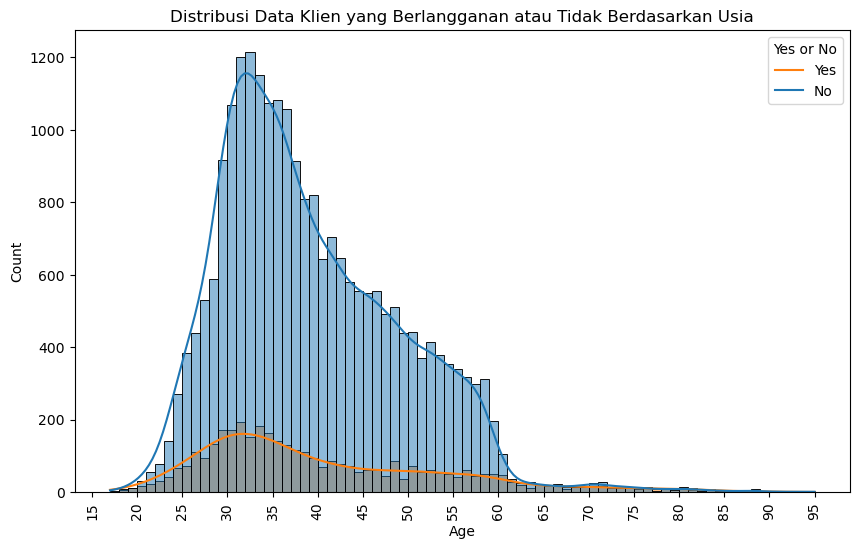

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bank, x='age', hue='y', kde=True, bins=78)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribusi Data Klien yang Berlangganan atau Tidak Berdasarkan Usia')
plt.xticks(rotation=90, ticks=range(15, 100, 5))
plt.legend(title='Yes or No', labels=['Yes', 'No'], loc='upper right')
plt.show()

Gambar di atas menampilkan distribusi data klien yang berlangganan atau tidak berdasarkan usia. Diketahui bahwa klien dari bank banyak dari kalangan usia 30 - 35 tahun, baik itu yang berlangganan deposito ataupun tidak semuanya didominasi oleh kalangan pada rentang usia tersebut.

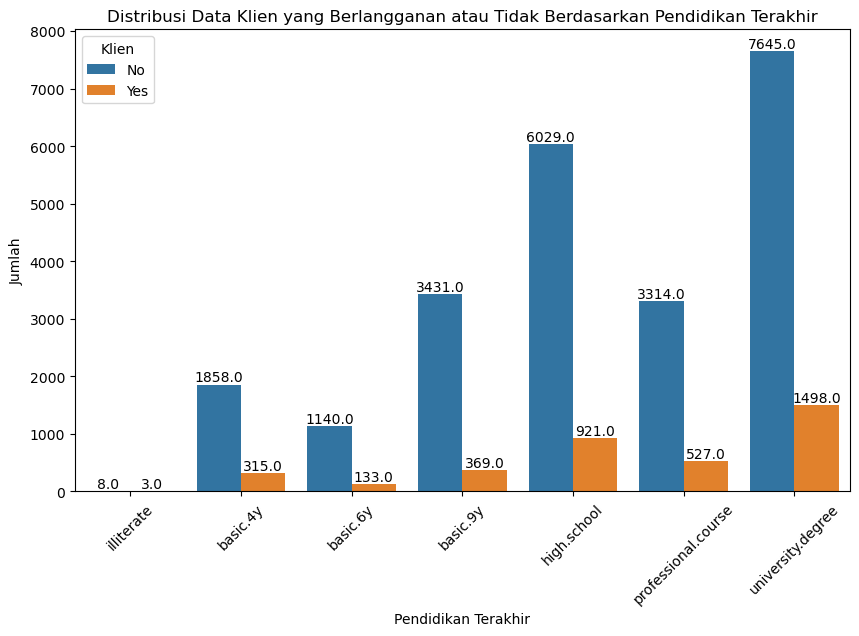

In [188]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=bank, x='education', hue='y', order=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'])

# Menambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Pendidikan Terakhir')
plt.ylabel('Jumlah')
plt.title('Distribusi Data Klien yang Berlangganan atau Tidak Berdasarkan Pendidikan Terakhir')
plt.xticks(rotation=45)
plt.legend(title='Klien', labels=['No', 'Yes'], loc='upper left')
plt.show()

Gambar di atas menampilkan distribusi data klien yang berlangganan atau tidak berdasarkan pendidikan terakhir. Didapatkan data bahwa klien di dominasi oleh orang-orang dengan pendidikan terakhir di universitas (sarjana). ada 1498 klien yang berlangganan deposito memiliki pendidikan terakhir di universitas (sarjana), kemudian diurutan ke dua diikuti oleh klien dengan pendidikan terakhir di SMA atau high school.

# Preprosesing

In [189]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,0,nonexistent,1.1,93.994,4.857,5191.0,no


In [190]:
# Menentukan kolom-kolom yang akan dilakukan label encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Melakukan label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    bank[col] = label_encoder.fit_transform(bank[col])

# Menampilkan hasil
bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,0,1,1.1,93.994,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,0,1,1.1,93.994,4.857,5191.0,0


In [191]:
# Memisahkan fitur dan target
X = bank.drop('y', axis=1)
Y = bank['y']

In [192]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [193]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
24435,42,9,1,5,0,1,1,1,7,1,0,1,-0.1,93.200,4.191,5195.8
34216,35,0,2,6,0,0,0,0,6,4,0,1,-1.8,92.893,1.281,5099.1
9750,54,4,1,6,0,0,0,1,4,1,0,1,1.4,94.465,4.961,5228.1
31635,29,7,1,5,0,0,0,0,6,2,0,1,-1.8,92.893,1.327,5099.1
2096,39,10,1,6,0,1,0,1,6,1,0,1,1.1,93.994,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,42,7,0,3,0,0,0,0,6,2,0,1,-1.8,92.893,1.266,5099.1
9292,32,0,2,3,0,0,1,1,4,0,0,1,1.4,94.465,4.967,5228.1
1523,35,9,2,5,0,1,0,1,6,2,0,1,1.1,93.994,4.855,5191.0
26376,32,0,1,5,0,1,0,0,7,2,0,1,-0.1,93.200,4.076,5195.8


In [194]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [195]:
pd.DataFrame(X_train_resampled)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,42,9,1,5,0,1,1,1,7,1,0,1,-0.1,93.200000,4.191000,5195.8
1,35,0,2,6,0,0,0,0,6,4,0,1,-1.8,92.893000,1.281000,5099.1
2,54,4,1,6,0,0,0,1,4,1,0,1,1.4,94.465000,4.961000,5228.1
3,29,7,1,5,0,0,0,0,6,2,0,1,-1.8,92.893000,1.327000,5099.1
4,39,10,1,6,0,1,0,1,6,1,0,1,1.1,93.994000,4.857000,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37451,41,7,1,3,0,0,0,1,6,0,0,1,1.1,93.994000,4.862697,5191.0
37452,78,5,1,0,0,0,0,0,3,1,0,1,-1.7,94.215000,0.870000,4991.6
37453,31,7,1,3,0,1,0,0,6,3,0,0,-1.8,92.893000,1.328894,5099.1
37454,33,9,0,6,0,1,0,0,4,2,0,1,-2.9,92.963000,1.261433,5076.2


In [196]:
# Normalisasi atau Penskalaan Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [197]:
# Pemilihan Fitur
selector = SelectKBest(score_func=chi2, k=11)  # Memilih 5 fitur terbaik
X_train_selected = selector.fit_transform(X_train_scaled, Y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

In [198]:
selector.get_feature_names_out()

array(['x2', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x12', 'x13', 'x14',
       'x15'], dtype=object)

# Model

In [199]:
# Inisialisasi model

logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()

### 1. Logistic Regression

In [200]:
# Melatih dan mengevaluasi Logistic Regression
logreg_model.fit(X_train_selected, Y_train_resampled)
logreg_pred = logreg_model.predict(X_test_selected)
print("Model: Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, logreg_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, logreg_pred))
print("=====================\n")

Model: Logistic Regression
Confusion Matrix:
[[3740  957]
 [ 304  438]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4697
           1       0.31      0.59      0.41       742

    accuracy                           0.77      5439
   macro avg       0.62      0.69      0.63      5439
weighted avg       0.84      0.77      0.79      5439




### 2. KNN

In [201]:
# Melatih dan mengevaluasi K-Nearest Neighbors (KNN)
knn_model.fit(X_train_selected, Y_train_resampled)
knn_pred = knn_model.predict(X_test_selected)
print("Model: K-Nearest Neighbors (KNN)")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, knn_pred))
print("=====================\n")

Model: K-Nearest Neighbors (KNN)
Confusion Matrix:
[[4291  406]
 [ 405  337]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4697
           1       0.45      0.45      0.45       742

    accuracy                           0.85      5439
   macro avg       0.68      0.68      0.68      5439
weighted avg       0.85      0.85      0.85      5439




### 3. SVM

In [202]:
# Melatih dan mengevaluasi Support Vector Machine (SVM)
svm_model.fit(X_train_selected, Y_train_resampled)
svm_pred = svm_model.predict(X_test_selected)
print("Model: Support Vector Machine (SVM)")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svm_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, svm_pred))
print("=====================\n")

Model: Support Vector Machine (SVM)
Confusion Matrix:
[[3824  873]
 [ 305  437]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4697
           1       0.33      0.59      0.43       742

    accuracy                           0.78      5439
   macro avg       0.63      0.70      0.65      5439
weighted avg       0.85      0.78      0.81      5439




### 4. Decision Tree

In [203]:
# Melatih dan mengevaluasi Decision Tree
dt_model.fit(X_train_selected, Y_train_resampled)
dt_pred = dt_model.predict(X_test_selected)
print("Model: Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, dt_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, dt_pred))
print("=====================\n")

Model: Decision Tree
Confusion Matrix:
[[4376  321]
 [ 485  257]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4697
           1       0.44      0.35      0.39       742

    accuracy                           0.85      5439
   macro avg       0.67      0.64      0.65      5439
weighted avg       0.84      0.85      0.84      5439




### 5. Random Forest

In [204]:
# Melatih dan mengevaluasi Random Forest
rf_model.fit(X_train_selected, Y_train_resampled)
rf_pred = rf_model.predict(X_test_selected)
print("Model: Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, rf_pred))
print("=====================\n")

Model: Random Forest
Confusion Matrix:
[[4344  353]
 [ 451  291]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4697
           1       0.45      0.39      0.42       742

    accuracy                           0.85      5439
   macro avg       0.68      0.66      0.67      5439
weighted avg       0.84      0.85      0.85      5439




### 6. Naive Bayes

In [205]:
# Melatih dan mengevaluasi Naive Bayes
nb_model.fit(X_train_selected, Y_train_resampled)
nb_pred = nb_model.predict(X_test_selected)
print("Model: Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, nb_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, nb_pred))
print("=====================\n")

Model: Naive Bayes
Confusion Matrix:
[[3476 1221]
 [ 275  467]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      4697
           1       0.28      0.63      0.38       742

    accuracy                           0.72      5439
   macro avg       0.60      0.68      0.60      5439
weighted avg       0.84      0.72      0.76      5439




In [206]:
# Inisialisasi model
models = [
    "Logistic Regression",
    "K-Nearest Neighbors (KNN)",
    "Support Vector Machine (SVM)",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]

# Confusion Matrix
confusion_matrices = [
    confusion_matrix(Y_test, logreg_pred),
    confusion_matrix(Y_test, knn_pred),
    confusion_matrix(Y_test, svm_pred),
    confusion_matrix(Y_test, dt_pred),
    confusion_matrix(Y_test, rf_pred),
    confusion_matrix(Y_test, nb_pred)
]

# Classification Report
classification_reports = [
    classification_report(Y_test, logreg_pred, output_dict=True),
    classification_report(Y_test, knn_pred, output_dict=True),
    classification_report(Y_test, svm_pred, output_dict=True),
    classification_report(Y_test, dt_pred, output_dict=True),
    classification_report(Y_test, rf_pred, output_dict=True),
    classification_report(Y_test, nb_pred, output_dict=True)
]

# Membuat DataFrame
df_results = pd.DataFrame({
    'Model': models,
    'Confusion Matrix': confusion_matrices,
    'Classification Report': classification_reports
})

# Memisahkan metrik-metrik evaluasi
df_results['Precision (0)'] = df_results['Classification Report'].apply(lambda x: x['0']['precision'])
df_results['Precision (1)'] = df_results['Classification Report'].apply(lambda x: x['1']['precision'])
df_results['Recall (0)'] = df_results['Classification Report'].apply(lambda x: x['0']['recall'])
df_results['Recall (1)'] = df_results['Classification Report'].apply(lambda x: x['1']['recall'])
df_results['F1-score (0)'] = df_results['Classification Report'].apply(lambda x: x['0']['f1-score'])
df_results['F1-score (1)'] = df_results['Classification Report'].apply(lambda x: x['1']['f1-score'])

# Menghapus kolom 'Classification Report' yang tidak diperlukan
df_results.drop('Classification Report', axis=1, inplace=True)

# Menampilkan DataFrame
df_results


,Model,Confusion Matrix,Precision (0),Precision (1),Recall (0),Recall (1),F1-score (0),F1-score (1)
0,Logistic Regression,"[[3740, 957], [304, 438]]",0.924827,0.313978,0.796253,0.590296,0.855737,0.409920
1,K-Nearest Neighbors (KNN),"[[4291, 406], [405, 337]]",0.913756,0.453567,0.913562,0.454178,0.913659,0.453872
2,Support Vector Machine (SVM),"[[3824, 873], [305, 437]]",0.926132,0.333588,0.814137,0.588949,0.866531,0.425926
3,Decision Tree,"[[4376, 321], [485, 257]]",0.900226,0.444637,0.931659,0.346361,0.915673,0.389394
4,Random Forest,"[[4344, 353], [451, 291]]",0.905944,0.451863,0.924846,0.392183,0.915297,0.419913
5,Naive Bayes,"[[3476, 1221], [275, 467]]",0.926686,0.276659,0.740047,0.629380,0.822917,0.384362


Dari data di atas, didapatkan model terbaik, yaitu KNN. Hal itu didapatkan dari mempertimbangkan hasil pada data klien yang berlangganan(1). Model yang memiliki nilai precision yang lebih tinggi, recall yang lebih tinggi, dan F1-score yang lebih tinggi untuk kelas yang relevan (dalam kasus ini, kelas 1 atau 'Yes') cenderung dianggap lebih baik. Berdasarkan F1-score, model K-Nearest Neighbors (KNN) memiliki nilai yang paling tinggi (0.453872), menunjukkan performa yang baik dalam mengklasifikasikan pelanggan yang berlangganan. Dan juga nilai precision dan recall untuk model ini juga relatif seimbang. Untuk mempertimbangkan konteks bisnis dan preferensi terkait trade-off antara precision dan recall. Jika keseimbangan antara precision dan recall lebih penting, maka model KNN dapat menjadi pilihan yang baik.